In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importar os dados brutos
dadosbrutosCovid = pd.read_csv('brutos/HIST_PAINEL_COVIDBR_16fev2021.csv', sep=';', encoding='utf-8')

In [3]:
# Exibir o data frame
dadosbrutosCovid.tail(30)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1838253,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-18,3,3015268.0,265274,1047,4427,6,NaN,NaN,1.0
1838254,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-19,3,3015268.0,265886,612,4436,9,NaN,NaN,1.0
1838255,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-20,3,3015268.0,266506,620,4442,6,NaN,NaN,1.0
1838256,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-21,3,3015268.0,267340,834,4452,10,NaN,NaN,1.0
1838257,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-22,3,3015268.0,268394,1054,4460,8,NaN,NaN,1.0
1838258,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-23,3,3015268.0,269350,956,4468,8,NaN,NaN,1.0
1838259,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-24,4,3015268.0,270171,821,4476,8,NaN,NaN,1.0
1838260,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-25,4,3015268.0,271319,1148,4490,14,NaN,NaN,1.0
1838261,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-26,4,3015268.0,272375,1056,4505,15,NaN,NaN,1.0
1838262,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-27,4,3015268.0,273427,1052,4508,3,NaN,NaN,1.0


In [4]:
dadosbrutosCovid.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

Antes de fazer a análise dos dados, temos que consertar a representação das semanas. Os dados foram disponibilizados de forma que, a partir de janeiro de 2021 as semanas foram representadas como 1,2,3,...; porém é interessante para nossa análise que as semanas continuem sendo contadas sequencialmente.

In [5]:
dadosbrutosCovid.loc[:,'semanaEpi'] = [dadosbrutosCovid.loc[i,'semanaEpi']+53 if dadosbrutosCovid.loc[i,'data'].find('2021-') != -1 and dadosbrutosCovid.loc[i,'semanaEpi'] < 53 else dadosbrutosCovid.loc[i,'semanaEpi'] for i in range(dadosbrutosCovid['semanaEpi'].shape[0])]

In [7]:
dadosbrutosCovid.tail(60)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1838223,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-19,51,3015268.0,243834,622,4138,6,NaN,NaN,1.0
1838224,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-20,52,3015268.0,244243,409,4145,7,NaN,NaN,1.0
1838225,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-21,52,3015268.0,245243,1000,4156,11,NaN,NaN,1.0
1838226,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-22,52,3015268.0,245872,629,4169,13,NaN,NaN,1.0
1838227,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-23,52,3015268.0,246397,525,4181,12,NaN,NaN,1.0
1838228,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-24,52,3015268.0,246949,552,4188,7,NaN,NaN,1.0
1838229,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-25,52,3015268.0,247278,329,4192,4,NaN,NaN,1.0
1838230,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-26,52,3015268.0,247928,650,4198,6,NaN,NaN,1.0
1838231,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,NaN,NaN,1.0
1838232,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,NaN,NaN,1.0


Analisando os dados da minha cidade natal: Novo Horizonte - SP

In [14]:
# Filtrando as linhas correspondentes à cidade de Novo Horizonte - SP
dadosbrutosCovid_nh_sp = dadosbrutosCovid[dadosbrutosCovid['municipio'] == 'Novo Horizonte']
dadosbrutosCovid_nh_sp = dadosbrutosCovid_nh_sp[dadosbrutosCovid_nh_sp['estado'] == 'SP']

In [15]:
# Exibindo o novo data frame
dadosbrutosCovid_nh_sp

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1207173,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2020-03-27,13,41052.0,0,0,0,0,NaN,NaN,0.0
1207174,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2020-03-28,13,41052.0,0,0,0,0,NaN,NaN,0.0
1207175,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2020-03-29,14,41052.0,0,0,0,0,NaN,NaN,0.0
1207176,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2020-03-30,14,41052.0,0,0,0,0,NaN,NaN,0.0
1207177,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2020-03-31,14,41052.0,0,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207495,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2021-02-12,59,41052.0,1996,8,42,0,NaN,NaN,0.0
1207496,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2021-02-13,59,41052.0,1999,3,43,1,NaN,NaN,0.0
1207497,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2021-02-14,60,41052.0,1998,-1,43,0,NaN,NaN,0.0
1207498,Sudeste,SP,Novo Horizonte,35,353350.0,35151.0,CATANDUVA,2021-02-15,60,41052.0,2002,4,43,0,NaN,NaN,0.0


<AxesSubplot:xlabel='semana epidemiológica'>

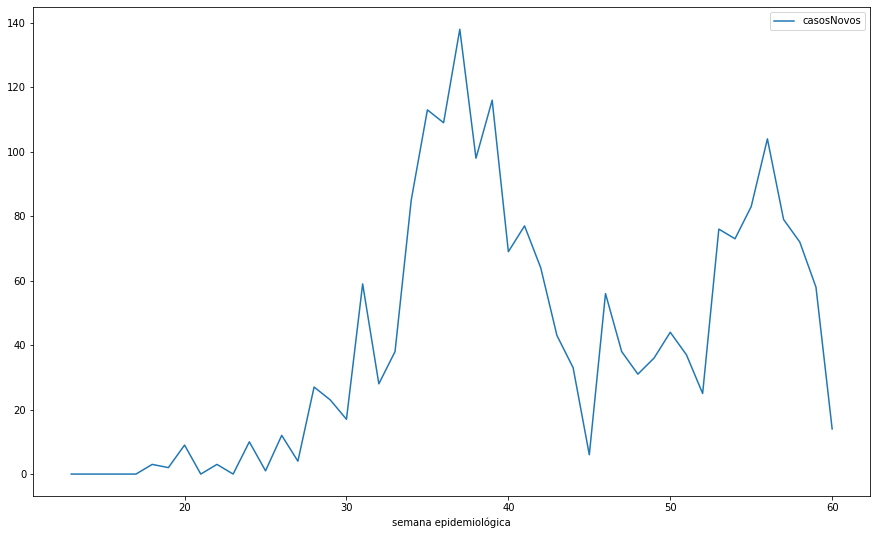

In [17]:
# Para as colunas 'semanaEpi' e 'casosNovos', agrupar pela coluna 'semanaEpi' somando os novos casos de cada semana epidemiológica e, finalmente, plotar o gráfico
dadosbrutosCovid_nh_sp[['semanaEpi', 'casosNovos']].groupby('semanaEpi').sum().plot(xlabel='semana epidemiológica', figsize=(15,9))

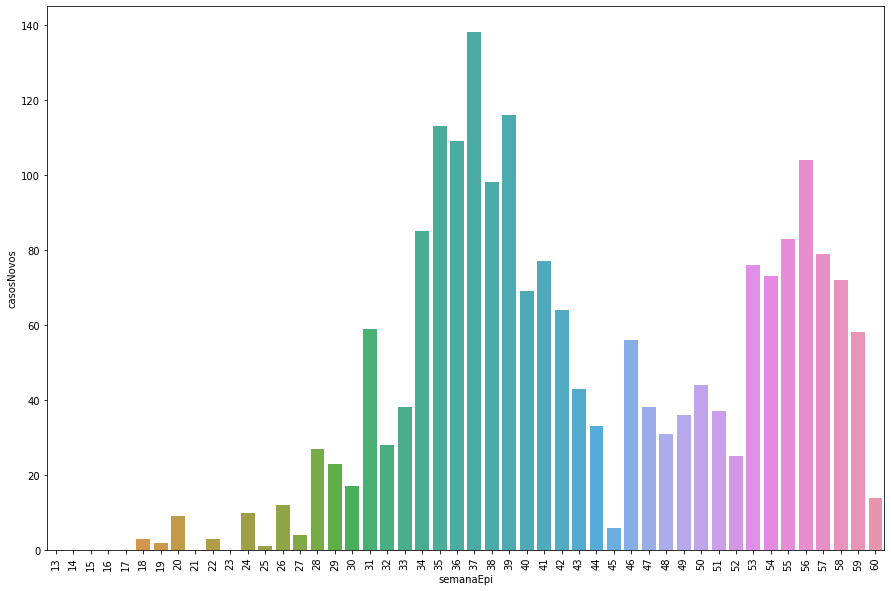

In [18]:
# Vamos histograma dos dados utilizando a biblioteca seaborn
plt.figure(figsize=(15,10))
dados_plot = dadosbrutosCovid_nh_sp[['semanaEpi', 'casosNovos']].groupby('semanaEpi').sum()
dados_plot['semanaEpi'] = list(range(min(dadosbrutosCovid_nh_sp['semanaEpi']),max(dadosbrutosCovid_nh_sp['semanaEpi'])+1))
sns.barplot(data=dados_plot,x='semanaEpi',y='casosNovos')
plt.xticks(rotation=90)
plt.show()

Analisando os casos na capital do meu estado: São Paulo - SP

In [70]:
# Filtrando as linhas correspondentes à cidade de São Paulo - SP
dadosbrutosCovid_sp_sp = dadosbrutosCovid[dadosbrutosCovid['municipio'] == 'São Paulo']
dadosbrutosCovid_sp_sp = dadosbrutosCovid_sp_sp[dadosbrutosCovid_sp_sp['estado'] == 'SP']

In [71]:
# Exibindo o novo data frame
dadosbrutosCovid_sp_sp

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1174389,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-27,13,12252023.0,0,0,0,0,NaN,NaN,1.0
1174390,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-28,13,12252023.0,1149,1149,76,76,NaN,NaN,1.0
1174391,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-29,14,12252023.0,1183,34,89,13,NaN,NaN,1.0
1174392,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-30,14,12252023.0,1233,50,103,14,NaN,NaN,1.0
1174393,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-31,14,12252023.0,1885,652,121,18,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174687,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2021-01-19,56,12252023.0,442477,3466,16667,75,NaN,NaN,1.0
1174688,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2021-01-20,56,12252023.0,445876,3399,16772,105,NaN,NaN,1.0
1174689,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2021-01-21,56,12252023.0,448744,2868,16855,83,NaN,NaN,1.0
1174690,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2021-01-22,56,12252023.0,450460,1716,16915,60,NaN,NaN,1.0


<AxesSubplot:xlabel='semana epidemiológica'>

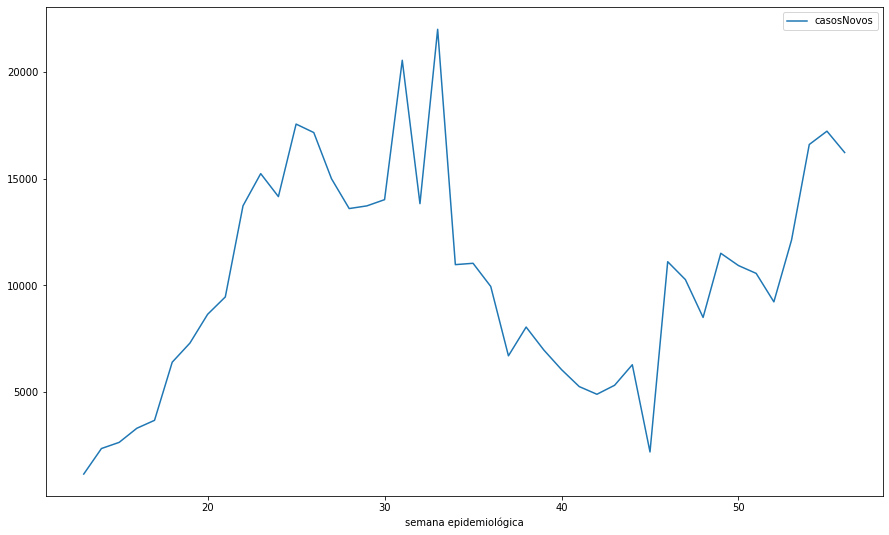

In [72]:
# Para as colunas 'semanaEpi' e 'casosNovos', agrupar pela coluna 'semanaEpi' somando os novos casos de cada semana epidemiológica e, finalmente, plotar o gráfico
dadosbrutosCovid_sp_sp[['semanaEpi', 'casosNovos']].groupby('semanaEpi').sum().plot(xlabel='semana epidemiológica', figsize=(15,9))

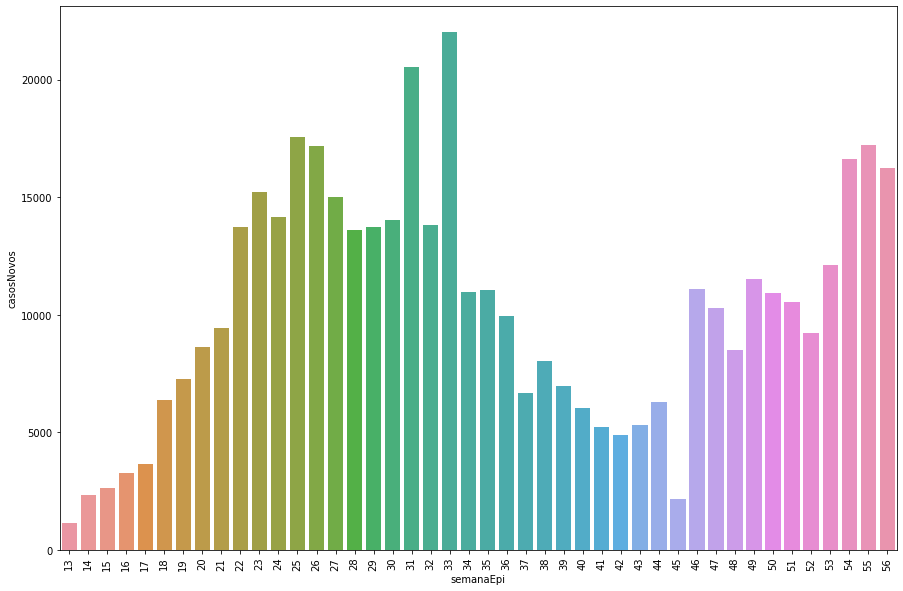

In [73]:
# Vamos histograma dos dados utilizando a biblioteca seaborn
plt.figure(figsize=(15,10))
dados_plot = dadosbrutosCovid_sp_sp[['semanaEpi', 'casosNovos']].groupby('semanaEpi').sum()
dados_plot['semanaEpi'] = list(range(min(dadosbrutosCovid_nh_sp['semanaEpi']),max(dadosbrutosCovid_nh_sp['semanaEpi'])+1))
sns.barplot(data=dados_plot,x='semanaEpi',y='casosNovos')
plt.xticks(rotation=90)
plt.show()

Vamos analisar agora os dados no município que eu estou morando atualmente: São Carlos - SP

In [9]:
# Filtrando as linhas correspondentes à cidade de São Carlos - SP
dadosbrutosCovid_sc_sp = dadosbrutosCovid[dadosbrutosCovid['municipio'] == 'São Carlos']
dadosbrutosCovid_sc_sp = dadosbrutosCovid_sc_sp[dadosbrutosCovid_sc_sp['estado'] == 'SP']

In [10]:
# Exibindo o novo data frame
dadosbrutosCovid_sc_sp

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1262109,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2020-03-27,13,251983.0,0,0,0,0,NaN,NaN,0.0
1262110,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2020-03-28,13,251983.0,0,0,0,0,NaN,NaN,0.0
1262111,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2020-03-29,14,251983.0,0,0,0,0,NaN,NaN,0.0
1262112,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2020-03-30,14,251983.0,0,0,0,0,NaN,NaN,0.0
1262113,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2020-03-31,14,251983.0,0,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262431,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2021-02-12,59,251983.0,8965,50,106,2,NaN,NaN,0.0
1262432,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2021-02-13,59,251983.0,9032,67,107,1,NaN,NaN,0.0
1262433,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2021-02-14,60,251983.0,9039,7,107,0,NaN,NaN,0.0
1262434,Sudeste,SP,São Carlos,35,354890.0,35034.0,CORACAO DO DRS III,2021-02-15,60,251983.0,9041,2,107,0,NaN,NaN,0.0


<AxesSubplot:xlabel='semana epidemiológica'>

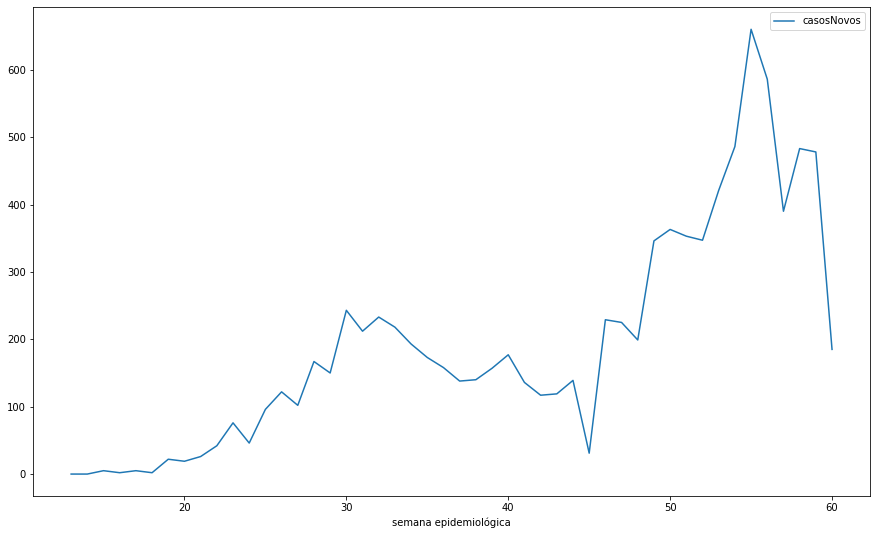

In [11]:
# Para as colunas 'semanaEpi' e 'casosNovos', agrupar pela coluna 'semanaEpi' somando os novos casos de cada semana epidemiológica e, finalmente, plotar o gráfico
dadosbrutosCovid_sc_sp[['semanaEpi', 'casosNovos']].groupby('semanaEpi').sum().plot(xlabel='semana epidemiológica', figsize=(15,9))

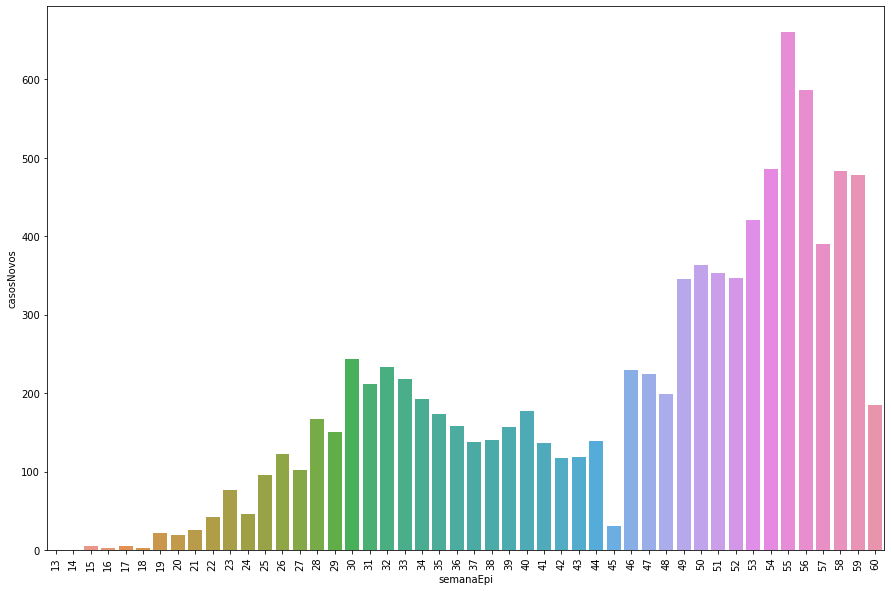

In [13]:
# Vamos histograma dos dados utilizando a biblioteca seaborn
plt.figure(figsize=(15,10))
dados_plot = dadosbrutosCovid_sc_sp[['semanaEpi', 'casosNovos']].groupby('semanaEpi').sum()
dados_plot['semanaEpi'] = list(range(min(dadosbrutosCovid_sc_sp['semanaEpi']),max(dadosbrutosCovid_sc_sp['semanaEpi'])+1))
sns.barplot(data=dados_plot,x='semanaEpi',y='casosNovos')
plt.xticks(rotation=90)
plt.show()